<a href="https://colab.research.google.com/github/yeneua/schoolWorks/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8_%EC%83%9D%EC%A1%B4%EC%9C%A8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 수집

In [ ]:
import seaborn as sns
import pandas as pd
from google.colab import files
titanic = sns.load_dataset("titanic") #sns패키지에 들어있는 titanic 데이터
titanic.to_csv('titanic.csv')
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

데이터 준비

In [ ]:
titanic.isnull().sum() #결측치 확인 - 결측치의 개수(변수별)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median()) #age 결측치 처리 - median으로 결측치 대체

In [ ]:
titanic['embark_town'].value_counts() #데이터의 값 확인

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')#embarked_town 결측치 처리 - 제일 많은 값으로 대체

In [ ]:
titanic['deck'].value_counts() #값 확인

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic['deck'] = titanic['deck'].fillna('C') #deck 결측치 처리 - 제일 많은 값으로 대체

In [ ]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('S') #embarked 결측치 처리 - 제일 많은 값으로 대체

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

데이터 탐색

In [ ]:
# 1. 데이터의 기본 정보 탐색하기 - 변수, 결측치, 타입 ...
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#target변수(survived) - 생존한 사람들
titanic.survived.value_counts()
# 1 : 생존, 0 : 사망

0    549
1    342
Name: survived, dtype: int64

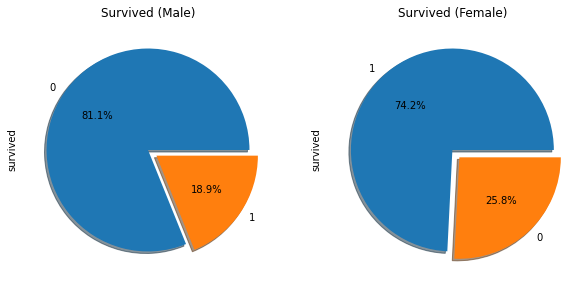

In [ ]:
# 2. 차트를 그려 데이터를 시각적으로 탐색하기
# 남자 승객과 여자 승객의 생존율을 pie차트로 그리기
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize = (10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

In [ ]:
# pie 차트 결과
# 남자 승객의 생존율 : 18.9%
# 여자 승객의 생존율 : 74.2%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


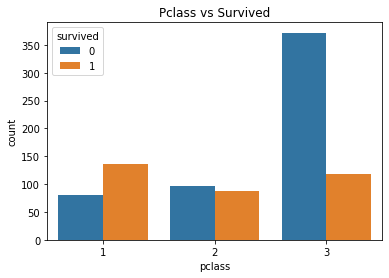

In [ ]:
# 3. 등급별 생존자 수를 차트로 나타내기
sns.countplot('pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

In [ ]:
# 1등급이 생존자 가장 많음
# 3등급이 사망자 가장 많음

데이터 모델링

In [ ]:
# 1. 상관 분석을 위한 상관 계수 구하고 저장하기
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
titanic_corr.to_csv('titanic_corr.csv')
files.download('titanic_corr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 2. 상관 계수 확인하기
titanic_corr[['adult_male','survived']]

,adult_male,survived
survived,-0.557080,1.000000
pclass,0.094035,-0.338481
age,0.247704,-0.064910
sibsp,-0.253586,-0.035322
parch,-0.349943,0.081629
fare,-0.182024,0.257307
adult_male,1.000000,-0.557080
alone,0.404744,-0.203367


In [ ]:
# 3. 특정 변수 사이의 상관 계수 구하기
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [ ]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

결과 시각화

ValueError: ignored

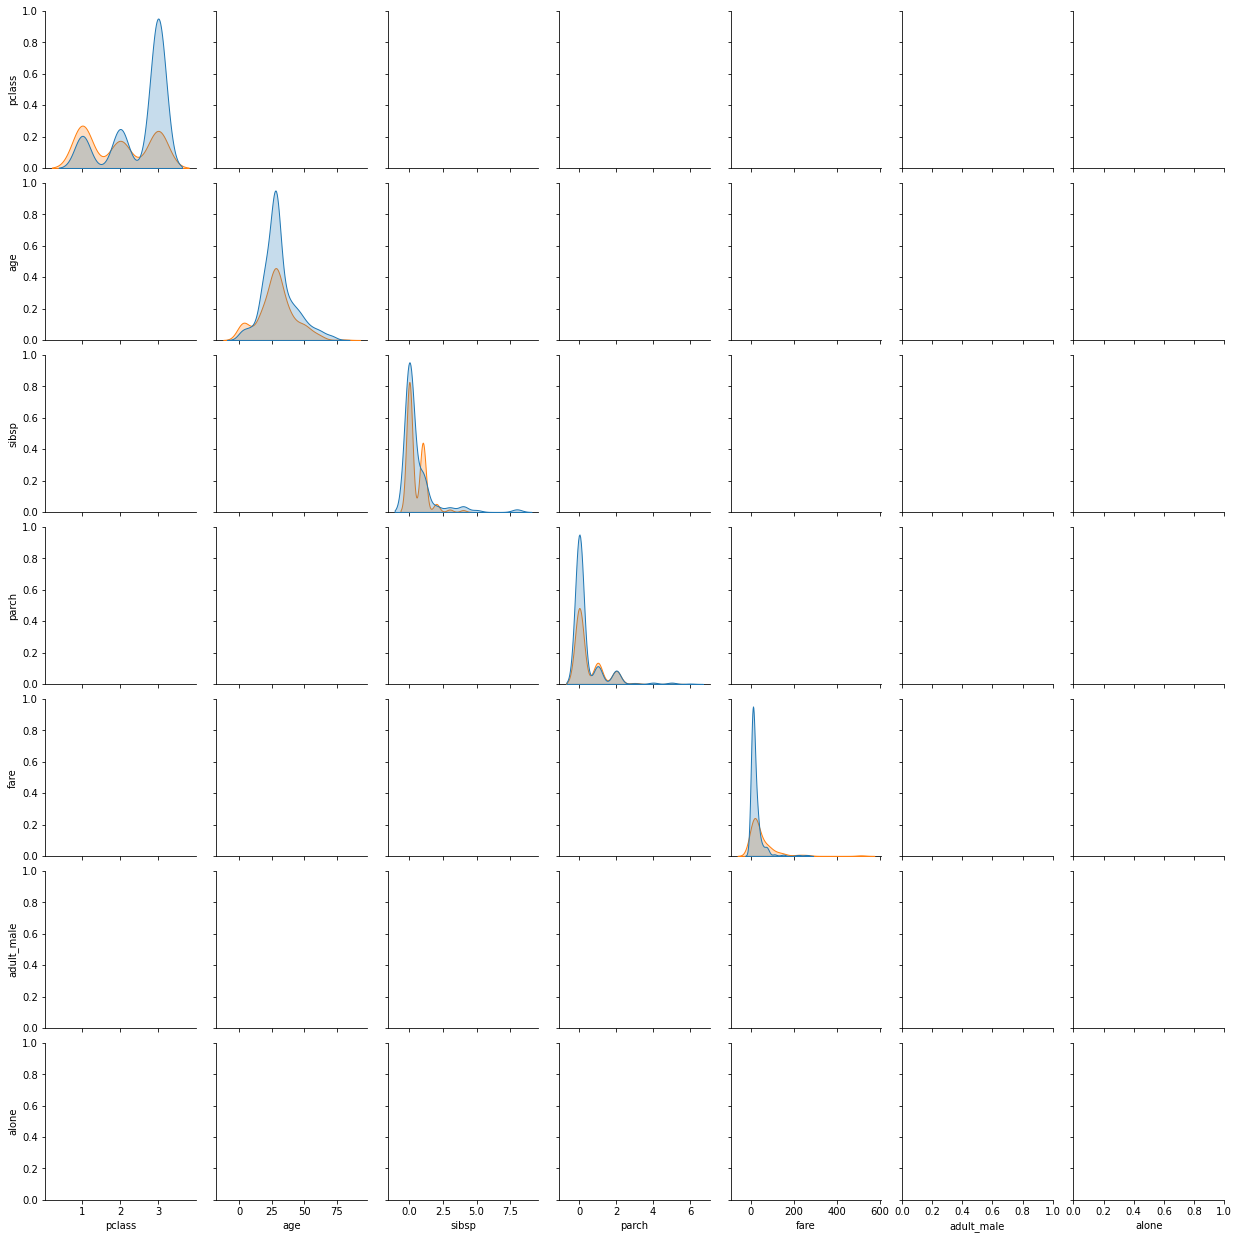

In [ ]:
# 1. 산점도로 상관 분석 시각화하기
sns.pairplot(titanic, hue = 'survived')
plt.show()
#error -> object arrays are not supported
# sex, embarked, who, embarked_town, alive

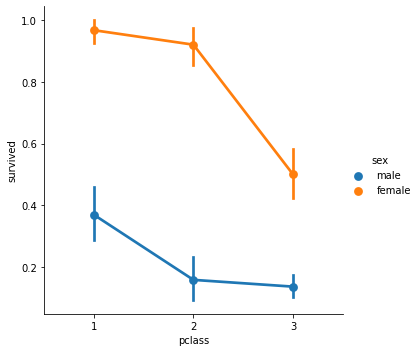

In [ ]:
# 2. 두 변수의 상관관계 시각화하기
# 생존자의 객실 등급과 성별 관계
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [ ]:
# 3. 변수 사이의 상관 계수를 히트맵으로 시각화
def category_age(x): # 연령 카테고리 만들기
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7

In [ ]:
titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0}) #성별 숫자로 변환
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1 #남매,배우자+부모님+1(본인)
titanic.to_csv('titanic3.csv')
files.download('titanic3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

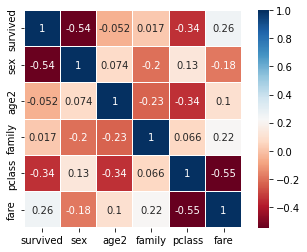

In [ ]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size" : 10})
plt.show()